In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

#### Lets read in our data sets

In [2]:
test_dataset = pd.read_csv('test_dataset.csv')

test_dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.813505,236.392817,40684.390014,6.608775,303.529818,278.355123,14.576057,72.872697,4.242460
1,8.466013,224.174936,22523.124552,6.668868,286.943922,330.044715,17.744096,77.817804,3.946621
2,6.350290,190.383738,14905.393852,5.537830,333.775777,446.840605,13.983567,67.817096,4.265233
3,9.578227,205.748742,33080.588825,5.659848,356.698301,333.069911,16.984961,68.906088,3.419239
4,7.300990,182.447697,29136.338677,8.253015,333.775777,307.433303,8.730149,49.895342,4.596347


In [3]:
train_dataset = pd.read_csv('train_dataset.csv')

train_dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


#### Let's do some data cleaning if needed

In [4]:
## if there is any nan (missing values)

train_dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [5]:
## lets check if we have correct data types

train_dataset.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

#### Lets do some EDA

####  let check the correlation between these features and potability

##### First let's  check how pH and Hardness will affect potability

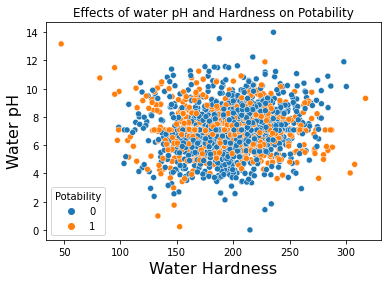

In [6]:
## ph vs potability

sns.scatterplot(y= "ph", x= "Hardness", hue = "Potability", data= train_dataset)

plt.xlabel("Water Hardness", fontsize= 16)
plt.ylabel("Water pH", fontsize= 16)
plt.title("Effects of water pH and Hardness on Potability")
plt.show()

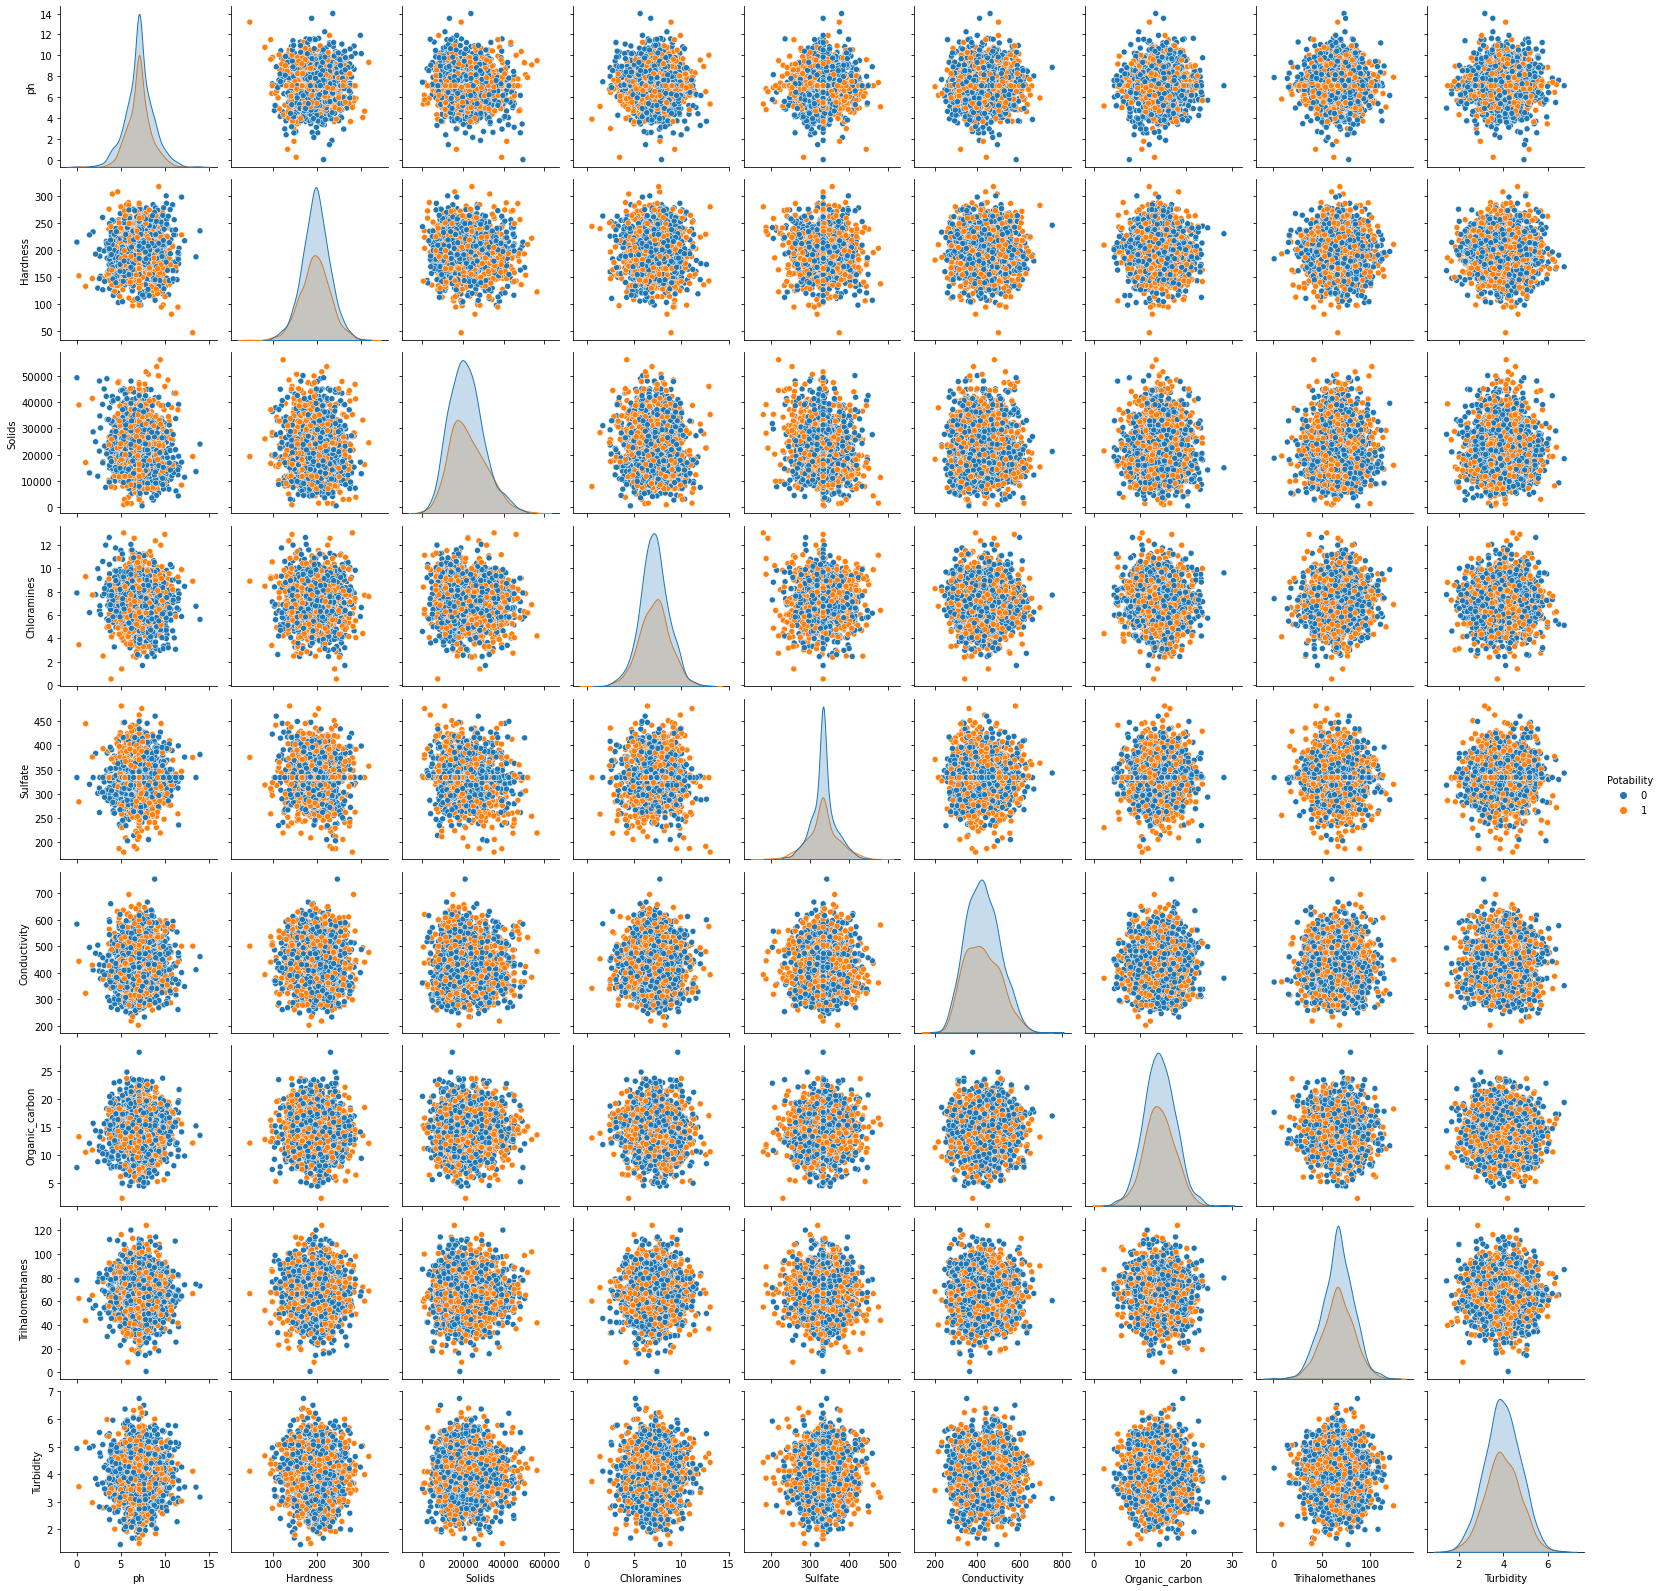

In [7]:
## we can as well do pairplot of everything

sns.pairplot(data = train_dataset, hue= "Potability")

plt.show()

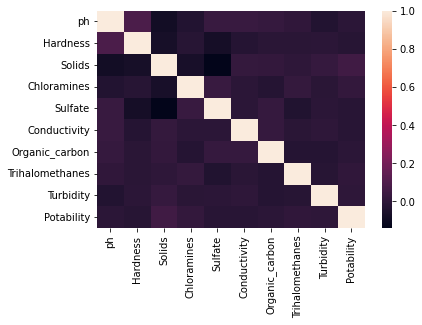

In [8]:
## lets visualize correlation

sns.heatmap(train_dataset.corr())
plt.show()

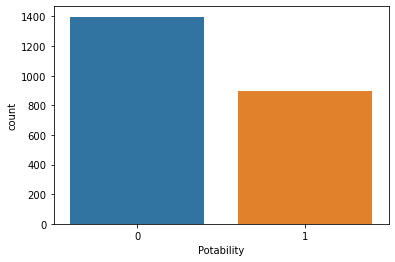

In [9]:
## let check the distribution of portability

sns.countplot(x='Potability', data= train_dataset)
plt.show()

### Modeling and Prediction

##### Preparing Data

In [10]:
y = train_dataset['Potability']
x = train_dataset.drop('Potability', axis=1)


In [11]:
print(x.shape)
print(y.shape)

(2293, 9)
(2293,)


In [12]:
## Normalise data

from sklearn.preprocessing import StandardScaler

In [13]:
transform = StandardScaler()

In [14]:
x = transform.fit(x).transform(x)

x

array([[-9.89755178e-04,  7.17453857e-01,  1.57241075e-02, ...,
        -8.16253498e-01,  2.85806845e+00, -1.23415447e+00],
       [-2.00831669e-01, -8.43283327e-02, -9.68895734e-01, ...,
         2.47519951e-01, -6.42575789e-03, -9.09708961e-01],
       [-7.21305877e-01, -3.64574957e-01, -7.07730607e-01, ...,
         1.82160679e+00,  1.07122539e+00,  1.14185588e+00],
       ...,
       [ 4.76952084e-01,  2.72320627e-03,  2.29267258e-01, ...,
         3.33505375e-01, -1.36669355e+00, -1.13019114e+00],
       [-6.34393942e-01, -8.61111251e-01,  2.09973687e-01, ...,
         1.46282138e+00, -3.88113700e-01, -1.59749210e-01],
       [-9.89755178e-04, -1.63588046e+00, -6.70508787e-01, ...,
         1.60335311e+00, -6.42575789e-03, -6.53821932e-01]])

In [15]:
y = y.to_numpy()

y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

##### Lets split data to train and test

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=4)

print ('x test shape :', x_test.shape)
print ('x train shape :', x_train.shape)
print ('y test shape :', y_test.shape)
print ('y train shape :', y_train.shape)

x test shape : (459, 9)
x train shape : (1834, 9)
y test shape : (459,)
y train shape : (1834,)


In [18]:
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

#### Let's start with SVM Model

In [19]:
svm = SVC()

svm_param = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [1, 0.1, 0.01, 0.001]

}

In [20]:
svm_cv = GridSearchCV(svm, param_grid= svm_param, cv=3, n_jobs= -1, scoring= 'accuracy')

In [21]:
svm_cv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [22]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.6641136178057329


In [30]:
score = svm_cv.score(x_test, y_test)
score

0.6514161220043573

In [36]:
from sklearn.metrics import confusion_matrix

y_pred = svm_cv.predict(x_test)

cmsvm = confusion_matrix(y_test, y_pred)

cmsvm

array([[224,  60],
       [100,  75]], dtype=int64)

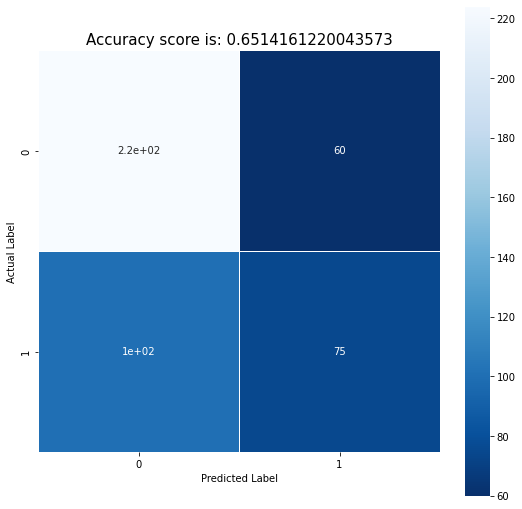

In [37]:
plt.figure(figsize=(9,9))

sns.heatmap(cmsvm, annot=True, linewidths= 0.5, square= True, cmap= 'Blues_r');
plt.xlabel("Predicted Label");
plt.ylabel('Actual Label');

allsampletitle = 'Accuracy score is: {0}'.format(score)
plt.title(allsampletitle, size = 15);


### lets try KNN



In [38]:
KNN = KNeighborsClassifier()

kparameter = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [42]:
knn_cv = GridSearchCV(KNN, param_grid= kparameter, cv= 10, n_jobs= -1, scoring= 'accuracy')

In [43]:
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [44]:
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 2}
accuracy : 0.6466856735566642


In [45]:
kscore = knn_cv.score(x_test, y_test)
kscore

0.644880174291939

In [46]:
ky_pred = knn_cv.predict(x_test)

cmknn = confusion_matrix(y_test, ky_pred)

cmknn

array([[252,  32],
       [131,  44]], dtype=int64)

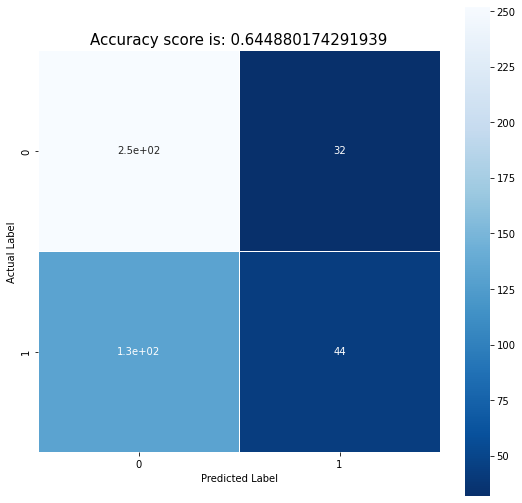

In [47]:
plt.figure(figsize=(9,9))

sns.heatmap(cmknn, annot=True, linewidths= 0.5, square= True, cmap= 'Blues_r');
plt.xlabel("Predicted Label");
plt.ylabel('Actual Label');

allsampletitle = 'Accuracy score is: {0}'.format(kscore)
plt.title(allsampletitle, size = 15);


#### Logistic Regression

In [53]:
Lr = LogisticRegression()

lrparam = {'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs', 'liblinear', 'sag', 'saga']}

In [54]:
lr_cv = GridSearchCV(Lr, param_grid= lrparam, cv= 10, n_jobs= -1, scoring= 'accuracy')

lr_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [55]:
print("tuned hpyerparameters :(best parameters) ", lr_cv.best_params_)
print("accuracy :", lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.6074126870990734


In [56]:
lrscore = lr_cv.score(x_test, y_test)

lrscore

0.6187363834422658

In [57]:
ly_pred = lr_cv.predict(x_test)

cmlr = confusion_matrix(y_test, ly_pred)

cmlr

array([[284,   0],
       [175,   0]], dtype=int64)

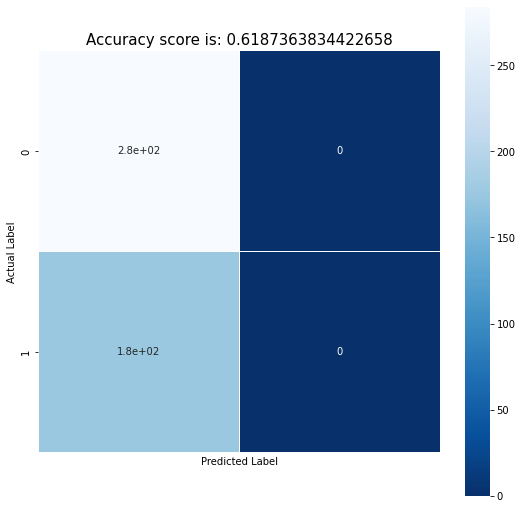

In [64]:
plt.figure(figsize=(9,9))

sns.heatmap(cmlr, annot=True, linewidths= 0.5, square= True, cmap= 'Blues_r');
plt.xlabel("Predicted Label");
plt.ylabel('Actual Label');

allsampletitle = 'Accuracy score is: {0}'.format(lrscore)
plt.title(allsampletitle, size = 15);

### Decision Tree

In [65]:
dt = DecisionTreeClassifier()

dtparam = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [66]:
dt_cv = GridSearchCV(dt, param_grid= dtparam, cv= 10, n_jobs= -1, scoring= 'accuracy')

dt_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [67]:
print("tuned hpyerparameters :(best parameters) ",dt_cv.best_params_)
print("accuracy :",dt_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.6450582086006177


In [68]:
dtscore = dt_cv.score(x_test, y_test)

dtscore

0.6296296296296297

In [69]:
dty_pred = dt_cv.predict(x_test)

cmdt = confusion_matrix(y_test, dty_pred)

cmdt

array([[257,  27],
       [143,  32]], dtype=int64)

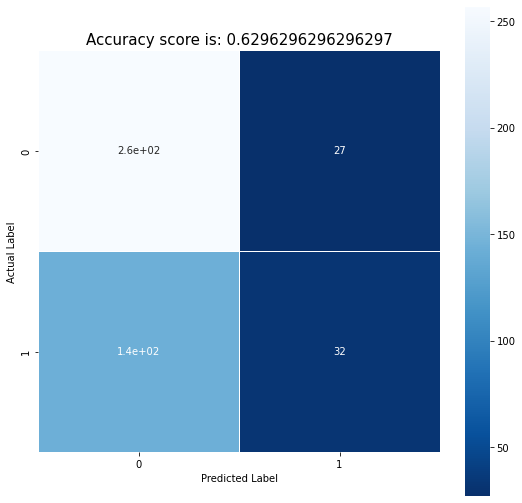

In [70]:
plt.figure(figsize=(9,9))

sns.heatmap(cmdt, annot=True, linewidths= 0.5, square= True, cmap= 'Blues_r');
plt.xlabel("Predicted Label");
plt.ylabel('Actual Label');

allsampletitle = 'Accuracy score is: {0}'.format(dtscore)
plt.title(allsampletitle, size = 15);

### SVM has the Highest Accuracy of the Models

#### - lets now test the SVM Model with the best hyperparameter on the test dataset given to us

In [71]:
test_dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.813505,236.392817,40684.390014,6.608775,303.529818,278.355123,14.576057,72.872697,4.242460
1,8.466013,224.174936,22523.124552,6.668868,286.943922,330.044715,17.744096,77.817804,3.946621
2,6.350290,190.383738,14905.393852,5.537830,333.775777,446.840605,13.983567,67.817096,4.265233
3,9.578227,205.748742,33080.588825,5.659848,356.698301,333.069911,16.984961,68.906088,3.419239
4,7.300990,182.447697,29136.338677,8.253015,333.775777,307.433303,8.730149,49.895342,4.596347


In [78]:
X_TEST = transform.fit(test_dataset).transform(test_dataset)

X_TEST

array([[ 1.21257991,  1.18427036,  2.09111978, ...,  0.04989404,
         0.44633248,  0.36329739],
       [ 0.96988013,  0.82318781,  0.07220859, ...,  1.03207475,
         0.7749165 , -0.02536836],
       [-0.50781334, -0.1754642 , -0.77462236, ..., -0.13379472,
         0.11040658,  0.39321621],
       ...,
       [ 0.33279014,  0.47118965, -0.83976467, ...,  1.16612691,
         0.01599948,  0.53685206],
       [ 0.03162026, -0.38178063,  1.04744126, ..., -0.10822025,
         0.73292164, -0.28309593],
       [ 0.9031287 ,  1.03797218, -0.75701136, ...,  0.18972603,
         0.08953634, -0.99228584]])

In [79]:
## build a new svm

best_svm = SVC(C = 10, gamma= 0.1, kernel= 'rbf')

In [80]:
best_svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [81]:
## lets predict on our test dataset

test_prediction = best_svm.predict(X_TEST)

In [82]:
test_prediction

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,

In [83]:
## lets generate this array as csv

submission = pd.DataFrame(test_prediction) #target is nothing but the final predictions of your model on input features of your new unseen test data
submission.columns = ["Potability"]
submission.to_csv("submission2.csv", index = False)